In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_dir = "/content/drive/MyDrive/campushiring/piyush_gupta"

In [4]:
import os
model_path = os.path.join(project_dir, "src/yolov8n-seg.pt")

In [5]:
model_path = os.path.join(project_dir, "src/yolov8n-seg.pt")

In [6]:
data_yaml = os.path.join(project_dir, "data/export-#Ug406mREPaSPGsWICLZw/data.yaml")

In [7]:
import torch

In [8]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on device: {device}")

Training on device: cuda


In [9]:
model = YOLO(model_path)

In [12]:
model.train(
    data=data_yaml,
    epochs=100,
    imgsz=640,
    batch=16,
    device=device,
    project=os.path.join(project_dir, "src/runs"),
    name="yolo-seg-finetune",
    exist_ok=True
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/campushiring/piyush_gupta/data/export-#Ug406mREPaSPGsWICLZw/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/campushiring/piyush_gupta/src/yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo-seg-finetune, n

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c39268a3ce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0

In [13]:
metrics = model.val(save=True)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,844 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 296.2±140.7 MB/s, size: 1037.1 KB)
val: Scanning /content/drive/MyDrive/campushiring/piyush_gupta/data/export-#Ug406mREPaSPGsWICLZw/labels/val.cache... 20 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 20/20 37.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.3it/s 6.6s
                   all         20        115      0.466      0.536      0.445      0.291       0.51      0.478      0.436      0.287
                  Road         13         19      0.439      0.618      0.567      0.396      0.487      0.526      0.544      0.449
            TwoWheeler          4          9       0.27      0.451      0.294      0.176      0.309      0.444      0

In [14]:
model.save()


📊 Validation Metrics:
{
    "metrics/precision(B)": 0.4661728368929149,
    "metrics/recall(B)": 0.535887537792691,
    "metrics/mAP50(B)": 0.44489421286969044,
    "metrics/mAP50-95(B)": 0.29079342389425417,
    "metrics/precision(M)": 0.5099974046659622,
    "metrics/recall(M)": 0.4784613350752769,
    "metrics/mAP50(M)": 0.43647800623521926,
    "metrics/mAP50-95(M)": 0.28738832496792605,
    "fitness": 0.5781817488621802
}


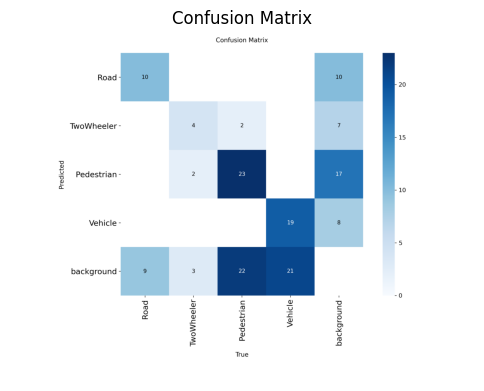

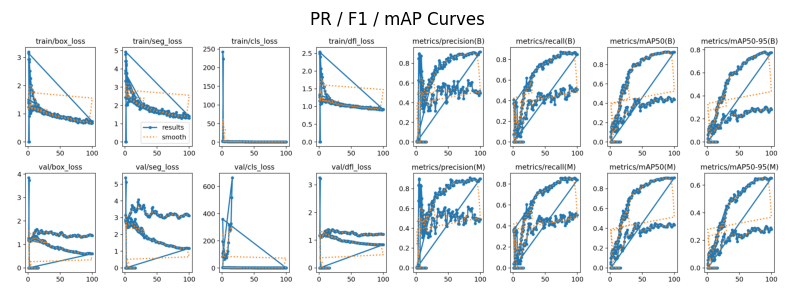

In [15]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

metrics_dict = metrics.results_dict

print("\n📊 Validation Metrics:")
print(json.dumps(metrics_dict, indent=4))

# Save as JSON
with open("metrics.json", "w") as f:
    json.dump(metrics_dict, f, indent=4)

# --------------------------
# 3. Show saved confusion matrix
# --------------------------
results_dir = "/content/drive/MyDrive/campushiring/piyush_gupta/src/runs/yolo-seg-finetune"

# Confusion Matrix
cm_path = f"{results_dir}/confusion_matrix.png"
cm = mpimg.imread(cm_path)
plt.figure(figsize=(6, 6))
plt.imshow(cm)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

# --------------------------
# 4. Show PR / F1 / mAP curves
# --------------------------
curves_path = f"{results_dir}/results.png"
curves = mpimg.imread(curves_path)
plt.figure(figsize=(10, 6))
plt.imshow(curves)
plt.axis("off")
plt.title("PR / F1 / mAP Curves")
plt.show()
